# **Data Information**


*   Get the data from : https://www.kaggle.com/c/reducing-commercial-aviation-fatalities/data (2019 data) The data used in the attached datasets were collected and provided to the Booz Allen Hamilton.

# **Problem Statement-**
The ​ problem statement​ for this case study talks about reducing the
commercial aviation fatalities. Most of the accidents in the aviation
industry occur because of loss of airplane state awareness. That might
happen due to ineffective management on the part of pilots due to
sleepiness, distraction or dangerous cognitive stage. This case study
asks to make a model based on given data to predict the troubling
situation based on physiological data of a pilot with the help of which
pilots could be alerted about troubling stage.





# ***Metric***-
Metric used for this problem is multiclass log loss which is define as

logloss = (-1/N)* Σ(i=1 to N) Σ(j=1 to M) (yij*log(Pij)

Here N is total data points in the train/test set ,yij is equal to one if the
pilot belongs to certain event else it is zero. Pij is the probability that
pilot i belong to event j. It is given that the submitted probabilities need not sum up to one because they are rescaled to one prior to
scoring them


# **Data Given**-
There are three csv files which are provided for this case study.
FIrst one is train.csv in which all the data which is to be used for
training is present. Test.csv is provided to test the model on this file.
Sample_submission.csv is provided to submit the final output in this
csv file.The pilots were made to go through various experimental
stages in a non flight simulation environment(take off , flight, landing).
The pilots were made to experience distractions to make them go
through following cognitive stages-

Channelized Attention (CA) - This type of attention is focussed on on
task and no other tasks were attended by the pilot.

Diverted Attention(DA) - This type of attention is diverted by the
processes related to the decision making.(Can be thought as
multitasking as attention is given to various tasks ie. it is not focussed
on only one task).

Startle/Surprise(SS) - Involves surprise or sudden change in scenario
when attention level gets disrupted.

# **Features in the dataset given**-
A. ID- This is unique identifier in test and sample submission csv only
which is used to identify each pilot.

B. Crew- This is unique identifiers for pair of pilots. There are 9 pilots in
the data.

C. Experiment- Experiment in which pilot was put through is mentioned
here. It may be CA,DA,SS or LOFT(Line of Flight Training only in test
data and sample).

D. Time - Seconds in the experimentE. Seat - Left(0) and Right(1)

E. EEG - Electroencephalography (EEG) measures the electrical activity in
the brain. An electrode is placed on the scalp which measures the
electrical voltage resulting from ionic current. So all the 20 features
which are present in the dataset are the voltages generated at
different sensors placed on different parts of the scalp.

F. ECG - Electrocardiogram measures the electrical activity in the heart. It
is measured in voltage. The sensor for this experiment had a
resolution/bit of .012215 μV and a range of -100mV to +100mV. The
data are provided in microvolts.

G. Respiration - This measures the rise and fall in the level of the chest.
The sensor had a resolution/bit of .2384186 μV and a range of -2.0V to
+2.0V. The data are provided in microvolts.

H. Galvanic Skin Response - This measures the electrodermal activity
which reflects sweat gland activity that are reflective of intensity of
emotional stress.The sensor had a resolution/bit of .2384186 μV and a
range of -2.0V to +2.0V. The data are provided in microvolts.

I. Event - The state of pilot at the given time: A=Baseline, B=SS, C=CA,
D=DA

In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.105 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-GB,en-US;q=0.9,en;q=0.8" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/11835/224935/compressed/train.csv.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1597744897&Signature=Uf%2BweJtE4BKI8KFhA%2B71BVNqBhYBIE95bO6CZrVEyXlvI7u4phEIdyTZo8aQOMOlVJ%2BROUocJFbYsqh5eJ7NY79HaB8NwUSjyvhUI5Ssj9kgNSD%2BaAYO1xio%2FtF0NKhqg3kSrKI1T8DtZf7%2FSuSS9TNyi5Pra05G8ovILa3Iv7NID%2B96J%2FPeam7sHDhVANW9O5SPu4O0jh8OJxE6gSOX36XLw6jXBmiq%2BARMGvQdouVnTDELcw6tCh0n%2BpZVj0NMXAbXft%2Fjp5dKuBAOcMRL2i%2BBNSLo%2FEr02kgH%2F%2FVGiHj4arouEZYwaV9um2ekh5pR5f8gY9guV%2BKHr1YuJ1y3pw%3D%3D&response-content-disposition=attachment%3B+filename%3Dtrain.csv.zip" -c -O 'train.csv.zip'

--2020-08-15 10:01:54--  https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/11835/224935/compressed/train.csv.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1597744897&Signature=Uf%2BweJtE4BKI8KFhA%2B71BVNqBhYBIE95bO6CZrVEyXlvI7u4phEIdyTZo8aQOMOlVJ%2BROUocJFbYsqh5eJ7NY79HaB8NwUSjyvhUI5Ssj9kgNSD%2BaAYO1xio%2FtF0NKhqg3kSrKI1T8DtZf7%2FSuSS9TNyi5Pra05G8ovILa3Iv7NID%2B96J%2FPeam7sHDhVANW9O5SPu4O0jh8OJxE6gSOX36XLw6jXBmiq%2BARMGvQdouVnTDELcw6tCh0n%2BpZVj0NMXAbXft%2Fjp5dKuBAOcMRL2i%2BBNSLo%2FEr02kgH%2F%2FVGiHj4arouEZYwaV9um2ekh5pR5f8gY9guV%2BKHr1YuJ1y3pw%3D%3D&response-content-disposition=attachment%3B+filename%3Dtrain.csv.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.126.128, 74.125.69.128, 172.217.212.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.126.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 456337398 (435M) [application/zip]
Saving to: ‘train.csv.zip’

trai

In [ ]:
! unzip train.csv.zip

Archive:  train.csv.zip
  inflating: train.csv               


In [ ]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.105 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-GB,en-US;q=0.9,en;q=0.8" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/11835/224935/compressed/test.csv.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1596511683&Signature=if2ODQZqapqNZT3oScmqloAMmgZpSiC5IxocoPdndZVzoO1y0T6rMHuWuF8XdP2gAKv9AR0HVwPUUJKssxrdR9mSx%2BzrJbqFDdev3XebNBTKfN9rXPfwsoYCnl1RaE9TSAaEsAthxDMuyeQw9%2BDHLeX5%2BW%2B%2B%2FIsscChTmTUpmafG6SCU944Up%2BVJa1ASgSHPJ9Xbgjur8Kyq71sUMOWWFmDrm6l5AGO%2FNnl44UxgCbs4hTCQTTpl5tbWwlznQRsEru4RclNz73GgNC5V%2Br74O%2FHPZw2ZnSSLZScjcTsrWRgBDHMswdcyyUwskYnDbQsWdBuBmKJy%2Fk7SF%2BKLOmTJ6Q%3D%3D&response-content-disposition=attachment%3B+filename%3Dtest.csv.zip" -c -O 'test.csv.zip'

--2020-08-01 03:31:05--  https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/11835/224935/compressed/test.csv.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1596511683&Signature=if2ODQZqapqNZT3oScmqloAMmgZpSiC5IxocoPdndZVzoO1y0T6rMHuWuF8XdP2gAKv9AR0HVwPUUJKssxrdR9mSx%2BzrJbqFDdev3XebNBTKfN9rXPfwsoYCnl1RaE9TSAaEsAthxDMuyeQw9%2BDHLeX5%2BW%2B%2B%2FIsscChTmTUpmafG6SCU944Up%2BVJa1ASgSHPJ9Xbgjur8Kyq71sUMOWWFmDrm6l5AGO%2FNnl44UxgCbs4hTCQTTpl5tbWwlznQRsEru4RclNz73GgNC5V%2Br74O%2FHPZw2ZnSSLZScjcTsrWRgBDHMswdcyyUwskYnDbQsWdBuBmKJy%2Fk7SF%2BKLOmTJ6Q%3D%3D&response-content-disposition=attachment%3B+filename%3Dtest.csv.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 142.250.107.128, 74.125.20.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1791131386 (1.7G) [application/zip]
Saving to: ‘test.csv.zip’

test.csv.zip  

In [ ]:
! unzip test.csv.zip

Archive:  test.csv.zip
  inflating: test.csv                


In [ ]:
train = pd.read_csv('train.csv')
train.head()

,crew,experiment,time,seat,eeg_fp1,eeg_f7,eeg_f8,eeg_t4,eeg_t6,eeg_t5,eeg_t3,eeg_fp2,eeg_o1,eeg_p3,eeg_pz,eeg_f3,eeg_fz,eeg_f4,eeg_c4,eeg_p4,eeg_poz,eeg_c3,eeg_cz,eeg_o2,ecg,r,gsr,event
0,1,CA,0.011719,1,-5.28545,26.775801,-9.527310,-12.793200,16.717800,33.737499,23.712299,-6.695870,29.232100,24.842899,3.92134,18.447001,1.07547,3.09029,37.368999,17.437599,19.201900,20.5968,-3.95115,14.507600,-4520.0,817.705994,388.829987,A
1,1,CA,0.015625,1,-2.42842,28.430901,-9.323510,-3.757230,15.969300,30.443600,21.010300,-6.474720,26.641399,24.138800,5.46991,20.510599,2.83354,7.10177,31.170799,19.399700,19.689501,21.3547,1.33212,17.750200,-4520.0,817.705994,388.829987,A
2,1,CA,0.019531,1,10.67150,30.420200,15.350700,24.724001,16.143101,32.142799,25.431801,-0.088707,28.119900,26.891300,8.57886,23.162901,4.51993,12.70550,-12.012600,19.396299,23.171700,22.4076,1.53786,22.247000,-4520.0,817.705994,388.829987,A
3,1,CA,0.023438,1,11.45250,25.609800,2.433080,12.412500,20.533300,31.494101,19.142799,-0.256516,30.653601,24.247000,8.64310,19.961901,7.27575,11.45980,18.574100,23.156401,22.641199,19.3367,2.54492,18.998600,-4520.0,817.705994,388.829987,A
4,1,CA,0.027344,1,7.28321,25.942600,0.113564,5.748000,19.833599,28.753599,20.572100,-1.953470,31.722601,25.155500,12.50030,18.746901,7.30976,8.00805,6.555440,22.754700,22.670300,20.2932,1.69962,22.812799,-4520.0,817.705994,388.829987,A


In [ ]:
test = pd.read_csv('test.csv')
test.head()

In [ ]:
train.shape

(4867421, 28)

In [ ]:
test.shape

(17965143, 28)

In [ ]:
train.isnull().any()

crew          False
experiment    False
time          False
seat          False
eeg_fp1       False
eeg_f7        False
eeg_f8        False
eeg_t4        False
eeg_t6        False
eeg_t5        False
eeg_t3        False
eeg_fp2       False
eeg_o1        False
eeg_p3        False
eeg_pz        False
eeg_f3        False
eeg_fz        False
eeg_f4        False
eeg_c4        False
eeg_p4        False
eeg_poz       False
eeg_c3        False
eeg_cz        False
eeg_o2        False
ecg           False
r             False
gsr           False
event         False
dtype: bool

In [ ]:
test.isnull().any()

id            False
crew          False
experiment    False
time          False
seat          False
eeg_fp1       False
eeg_f7        False
eeg_f8        False
eeg_t4        False
eeg_t6        False
eeg_t5        False
eeg_t3        False
eeg_fp2       False
eeg_o1        False
eeg_p3        False
eeg_pz        False
eeg_f3        False
eeg_fz        False
eeg_f4        False
eeg_c4        False
eeg_p4        False
eeg_poz       False
eeg_c3        False
eeg_cz        False
eeg_o2        False
ecg           False
r             False
gsr           False
dtype: bool

**Its good to see that there are no null values in the data. Now lets check the count of each event so as to know if there is any imbalance in the data. I will use countplot for that using https://seaborn.pydata.org/generated/seaborn.countplot.html?highlight=countplot#seaborn.countplot**

# Plotting Based analysis

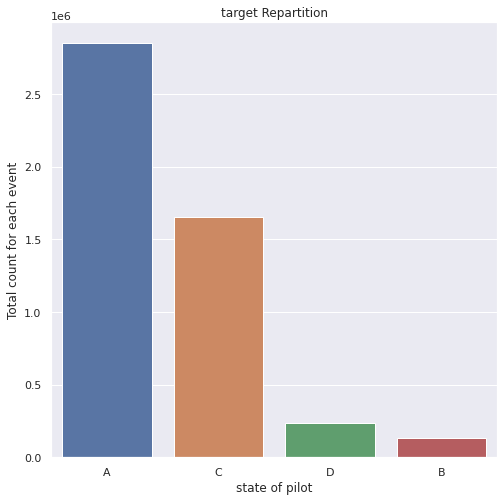

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(train['event'])
plt.xlabel('state of pilot')
plt.ylabel('Total count for each event')
plt.title('target Repartition')
plt.show()


***The data imbalance can be easily observed in the above plot that means there are few events which occur way too many times than the other few events which occur very few times.So key takeaway from this plot is there is an imbalance in this dataset***

Now lets get the general idea of the distribution of the features in this dataset using violinplots https://seaborn.pydata.org/generated/seaborn.violinplot.html?highlight=violinplot#seaborn.violinplot and distplot https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot as well.I got this idea from https://www.kaggle.com/theoviel/starter-code-eda-and-lgbm-baseline

## Time

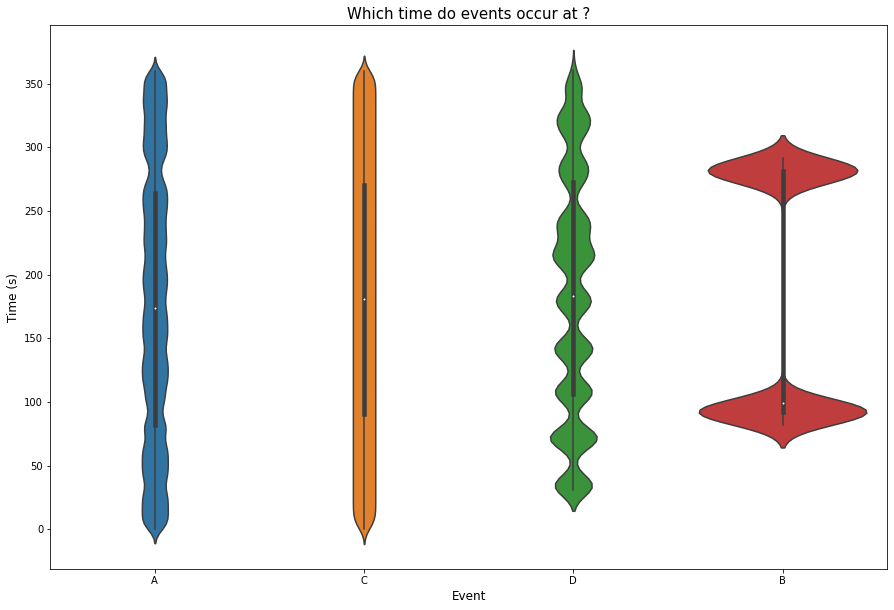

In [ ]:
plt.figure(figsize=(15,10))
sns.violinplot(x='event', y='time', data=train)
plt.ylabel("Time (s)", fontsize=12)
plt.xlabel("Event", fontsize=12)
plt.title("Which time do events occur at ?", fontsize=15)
plt.show()

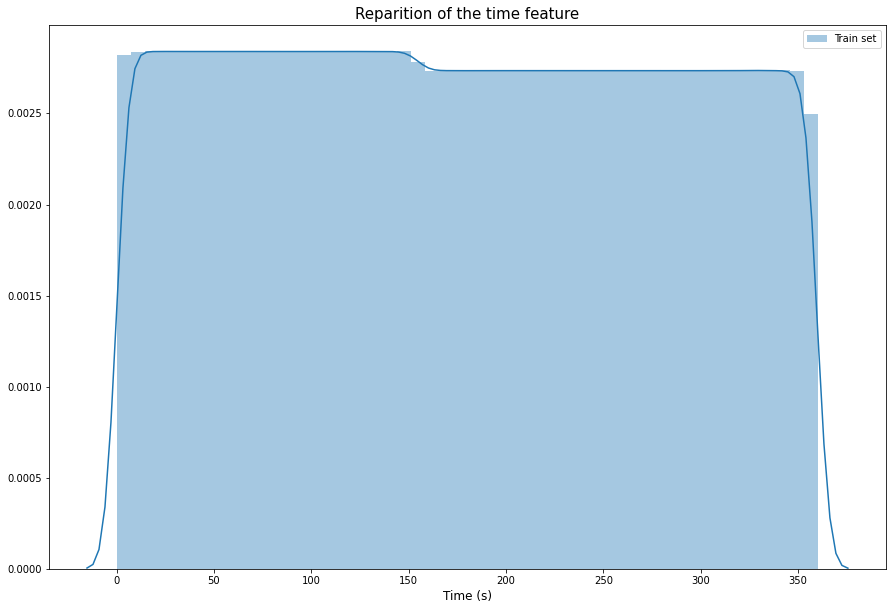

In [ ]:
plt.figure(figsize=(15,10))
# sns.distplot(test['time'], label='Test set')
sns.distplot(train['time'], label='Train set')
plt.legend()
plt.xlabel("Time (s)", fontsize=12)
plt.title("Reparition of the time feature", fontsize=15)
plt.show()

**We can see class B's violin plot tells us that the values of violin plot are present in very high and lower range of time axis and there are very few values in the mide-range.For other classes time feature is well distributed. From the second distplot we can say that Time into the experiment is on an average between 0 to 360 sec.**

## ECG

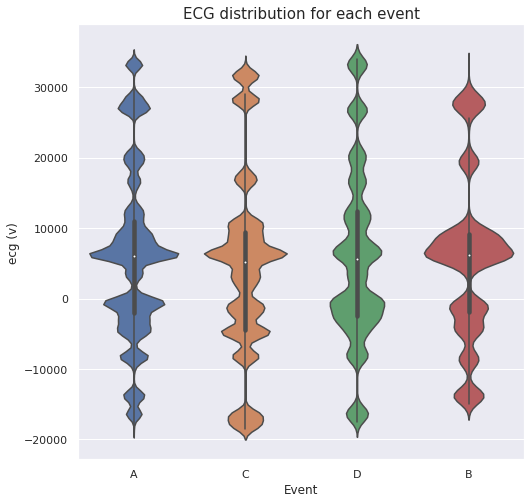

In [ ]:
plt.figure(figsize=(8,8))
sns.violinplot(x='event', y='ecg', data=train)
plt.ylabel("ecg (v)", fontsize=12)
plt.xlabel("Event", fontsize=12)
plt.title("ECG distribution for each event", fontsize=15)
plt.show()

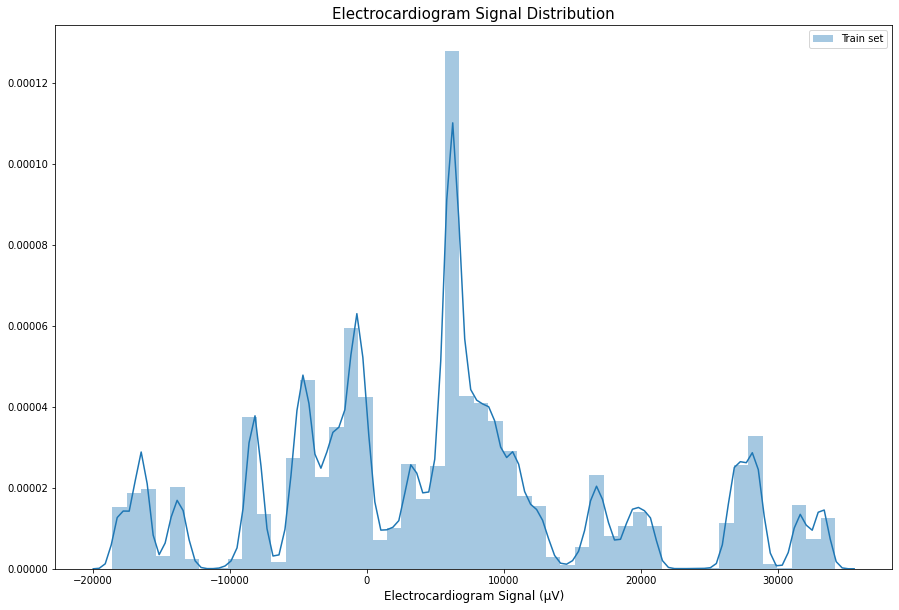

In [ ]:
plt.figure(figsize=(15,10))
# sns.distplot(test['ecg'], label='Test set')
sns.distplot(train['ecg'], label='Train set')
plt.legend()
plt.xlabel("Electrocardiogram Signal (µV)", fontsize=12)
plt.title("Electrocardiogram Signal Distribution", fontsize=15)
plt.show()


*  *** Violin plot tells us that for event A there are 
very few values in between range 22k to 25k uV.For event B there are very few values present between ecg values of 12k to 16k uV .For event C there are very few values between 19k to 25k uV. and -10k to -15k.For event D between -11k to -16k uV ecg microvolts there are very few values present that's the basic thing which we can observe from violin plot for ECG***
*   ***From the pdf of ECG we can see the range of values for ecg is between the rane of -20k to +35k uV (approx). We can see that there are very few values between the 20k to 25k uV range than other values of uV of ECG ***


# GSR (Galvanic Skin Response) - 

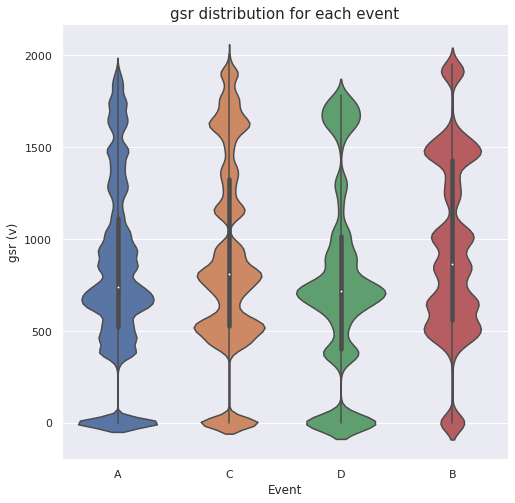

In [ ]:
plt.figure(figsize=(8,8))
sns.violinplot(x='event', y='gsr', data=train)
plt.ylabel("gsr (v)", fontsize=12)
plt.xlabel("Event", fontsize=12)
plt.title("gsr distribution for each event", fontsize=15)
plt.show()

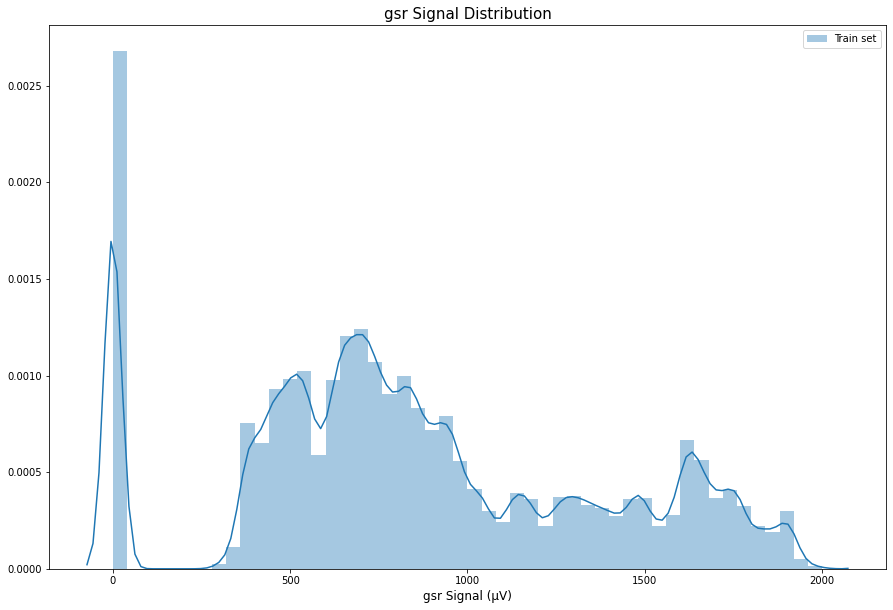

In [ ]:
plt.figure(figsize=(15,10))
# sns.distplot(test['gsr'], label='Test set')
sns.distplot(train['gsr'], label='Train set')
plt.legend()
plt.xlabel("gsr Signal (µV)", fontsize=12)
plt.title("gsr Signal Distribution", fontsize=15)
plt.show()



*   **From the violin plot for each event we can see that for each event there are almost no values of GSR in the range between 50 to 300 uV. Otherwise distributions are almost of same type. That means we cant simplt place any threshold on the GSR and use it to classify any particular class exclusively. ***
*  ***We can observe the same from the GSR pdf that there are very few values between 50uV to 300uV approximately***
*  ***The pdf of GSR has a range from 0 to 2000uV approximatey.***


# **Respiration**

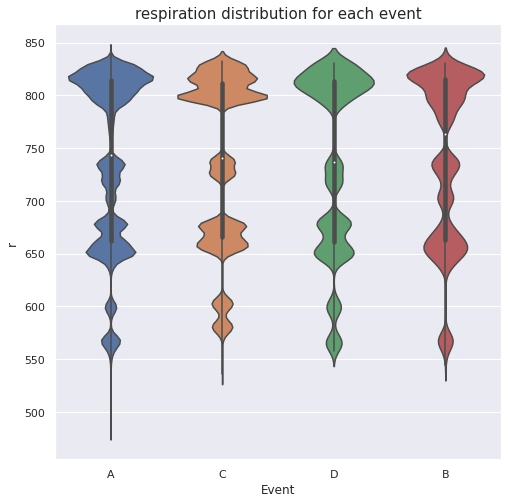

In [ ]:
plt.figure(figsize=(8,8))
sns.violinplot(x='event', y='r', data=train)
plt.ylabel("r ", fontsize=12)
plt.xlabel("Event", fontsize=12)
plt.title("respiration distribution for each event", fontsize=15)
plt.show() 

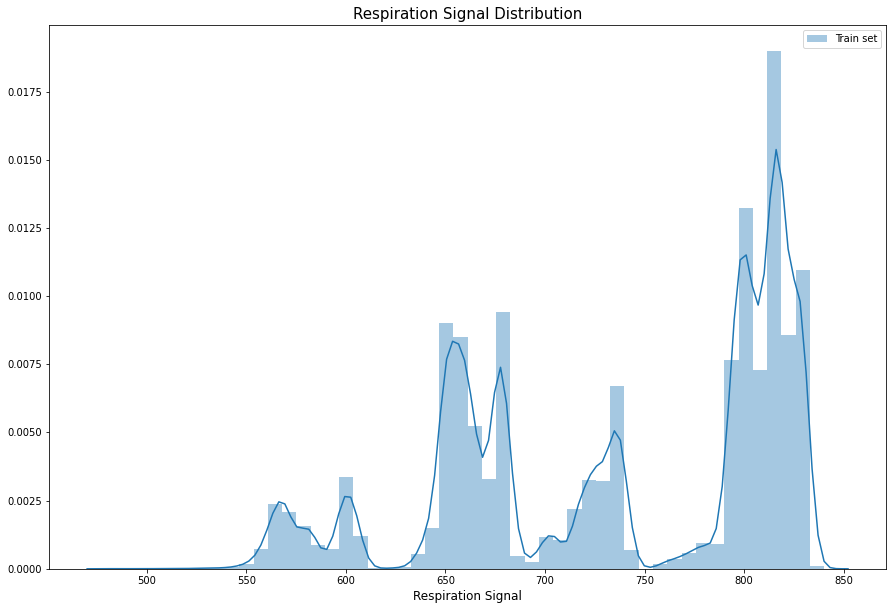

In [ ]:
plt.figure(figsize=(15,10))
# sns.distplot(test['r'], label='Test set')
sns.distplot(train['r'], label='Train set')
plt.legend()
plt.xlabel("Respiration Signal", fontsize=12)
plt.title("Respiration Signal Distribution", fontsize=15)
plt.show()

*   **From the violin plot we can see that there are very few values between 750 to 800 for event C and D and the there are few values of event A which are below the most of the other event's values ***
*   **We can see same thing for pdf of respiration  signal and the range of respiration signal is from 400 to 850 typically.**





# Seat

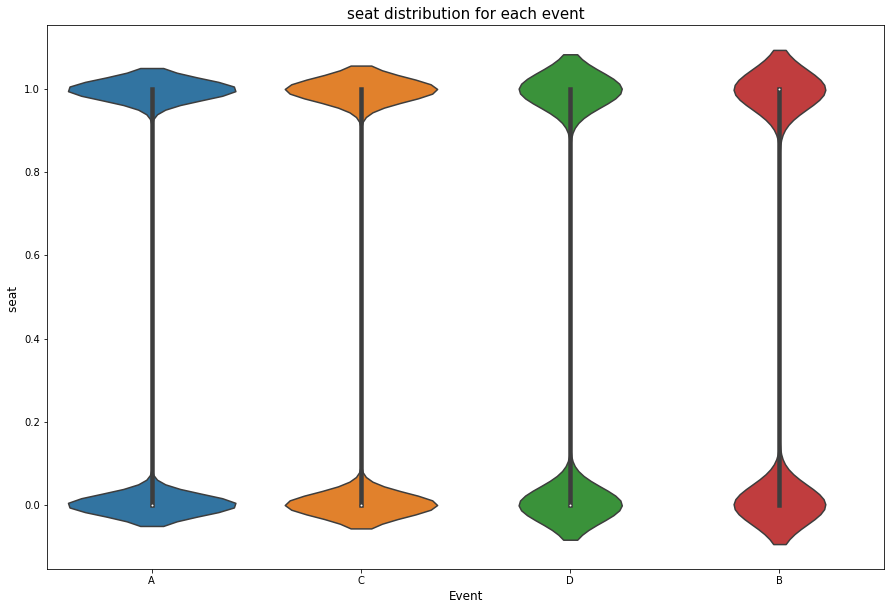

In [ ]:
plt.figure(figsize=(15,10))
sns.violinplot(x='event', y='seat', data=train)
plt.ylabel("seat ", fontsize=12)
plt.xlabel("Event", fontsize=12)
plt.title("seat distribution for each event", fontsize=15)
plt.show() 

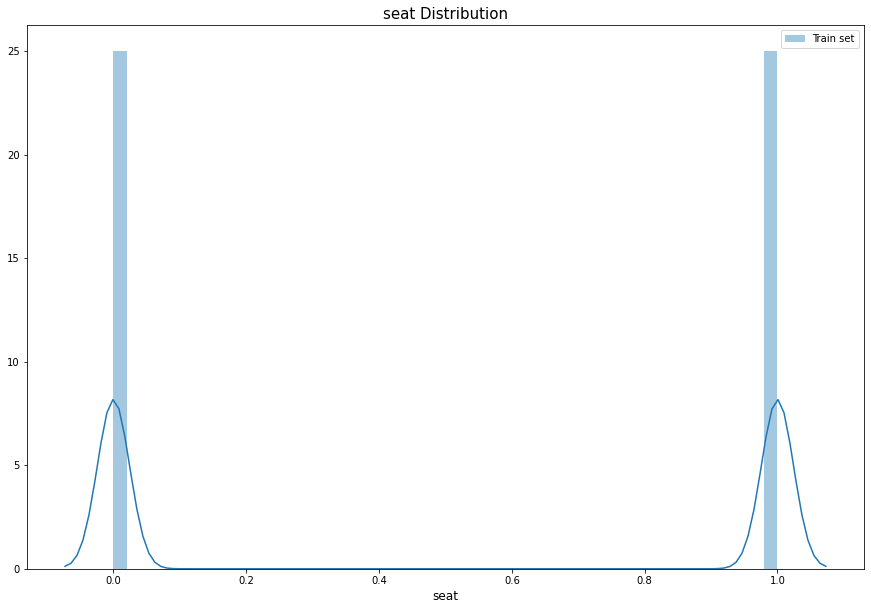

In [ ]:
plt.figure(figsize=(15,10))
# sns.distplot(test['r'], label='Test set')
sns.distplot(train['seat'], label='Train set')
plt.legend()
plt.xlabel("seat", fontsize=12)
plt.title("seat Distribution", fontsize=15)
plt.show()

**We can observe from the seat distribution that the values of the seat are wither 0 or 1 rest everyhwhere its value is almost 0.**

# EEG

In [ ]:
eeg_features = ["eeg_fp1", "eeg_f7", "eeg_f8", "eeg_t4", "eeg_t6", "eeg_t5", "eeg_t3", "eeg_fp2", "eeg_o1", "eeg_p3", "eeg_pz", "eeg_f3", "eeg_fz", "eeg_f4", "eeg_c4", "eeg_p4", "eeg_poz", "eeg_c3", "eeg_cz", "eeg_o2"]

since there are 20 eeg features and we are finding its distribution with event so we will have 20C1 plots=20

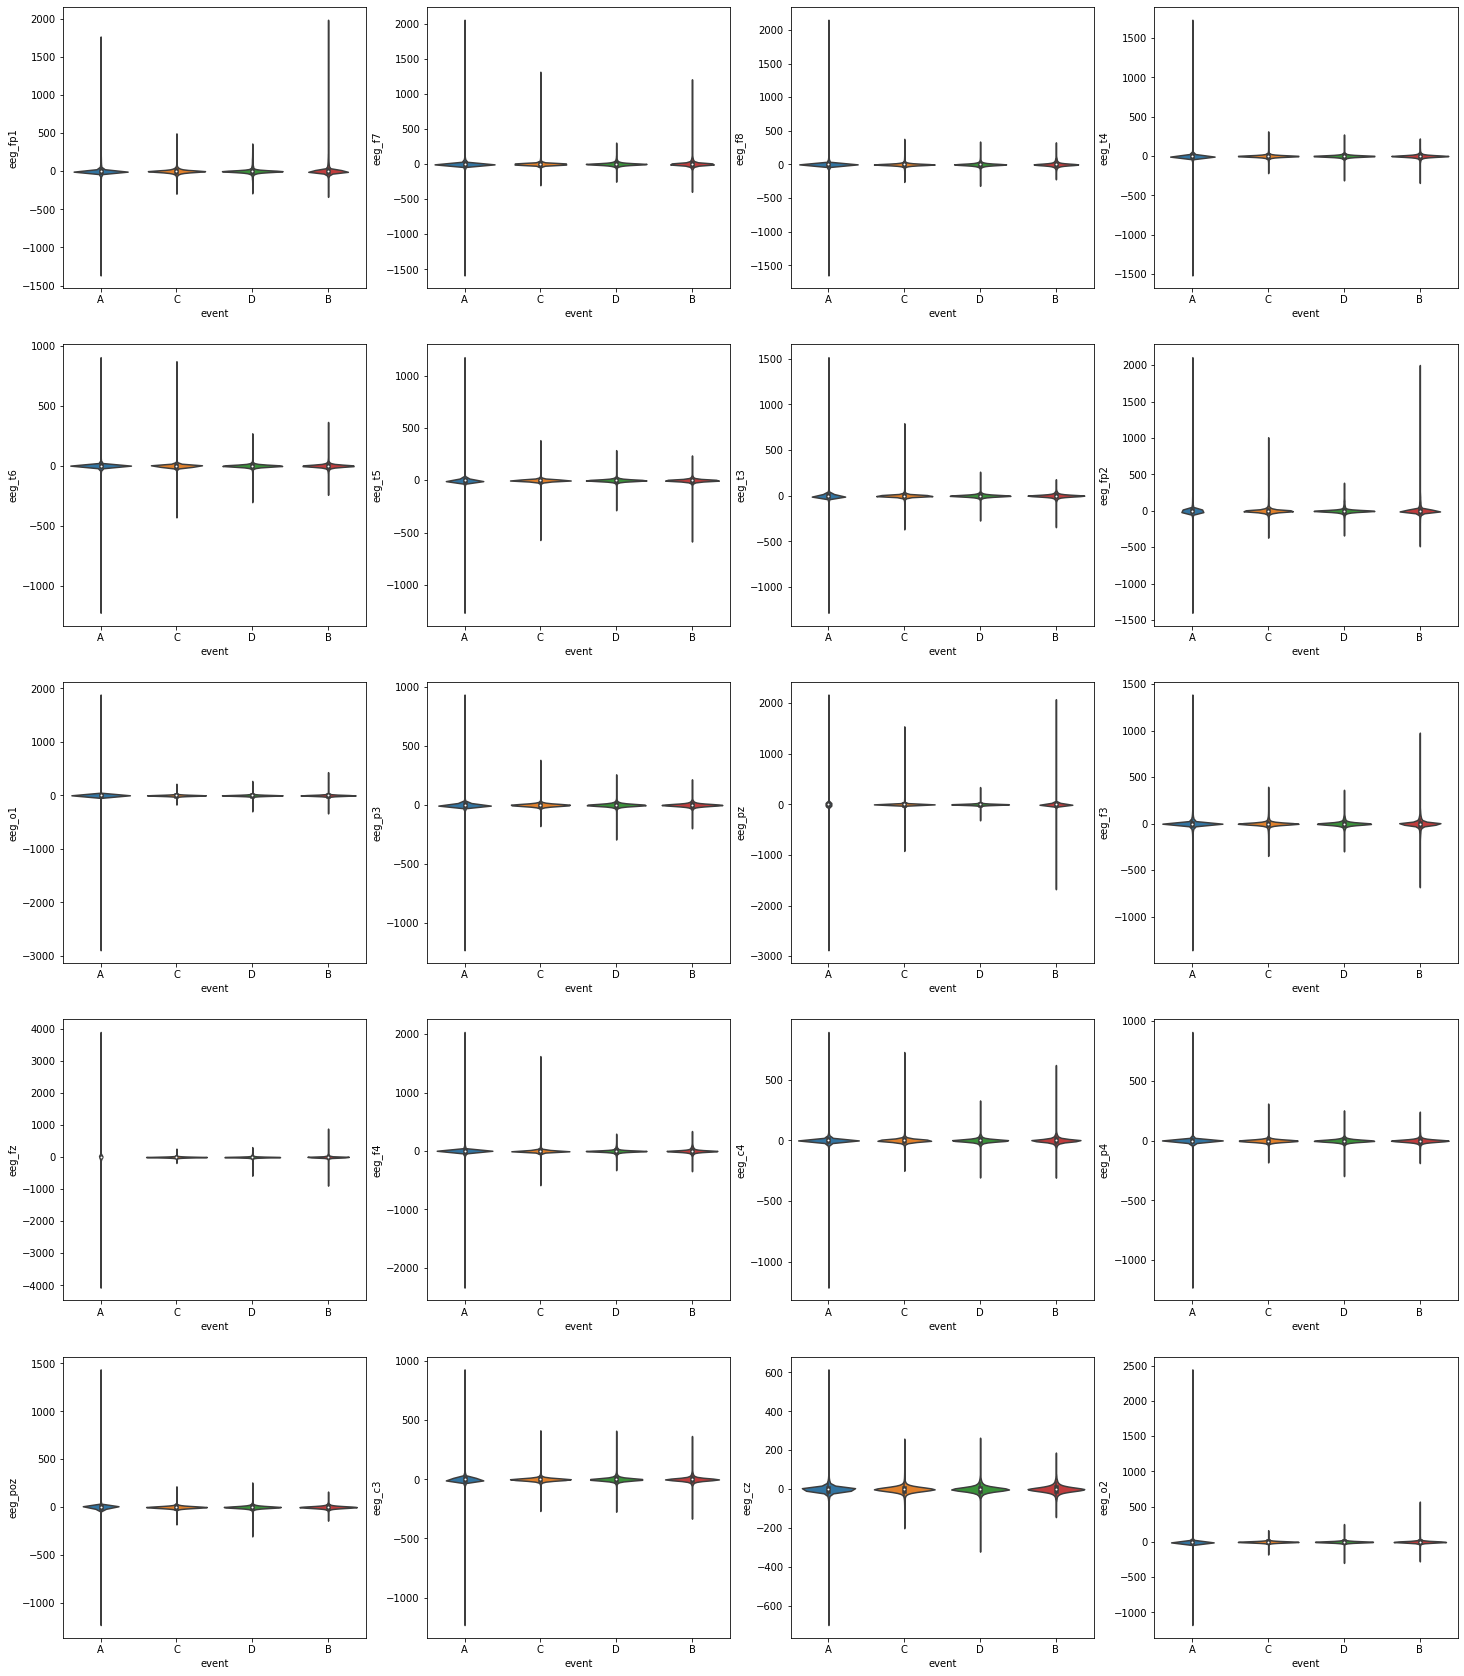

In [ ]:
from tqdm.auto import tqdm
plt.figure(figsize=(25,30))
frame=0
for i in tqdm(range(len(eeg_features))):
  frame+=1
  plt.subplot(5,4,frame)
  sns.violinplot(x='event', y=eeg_features[i], data= train)
plt.show()

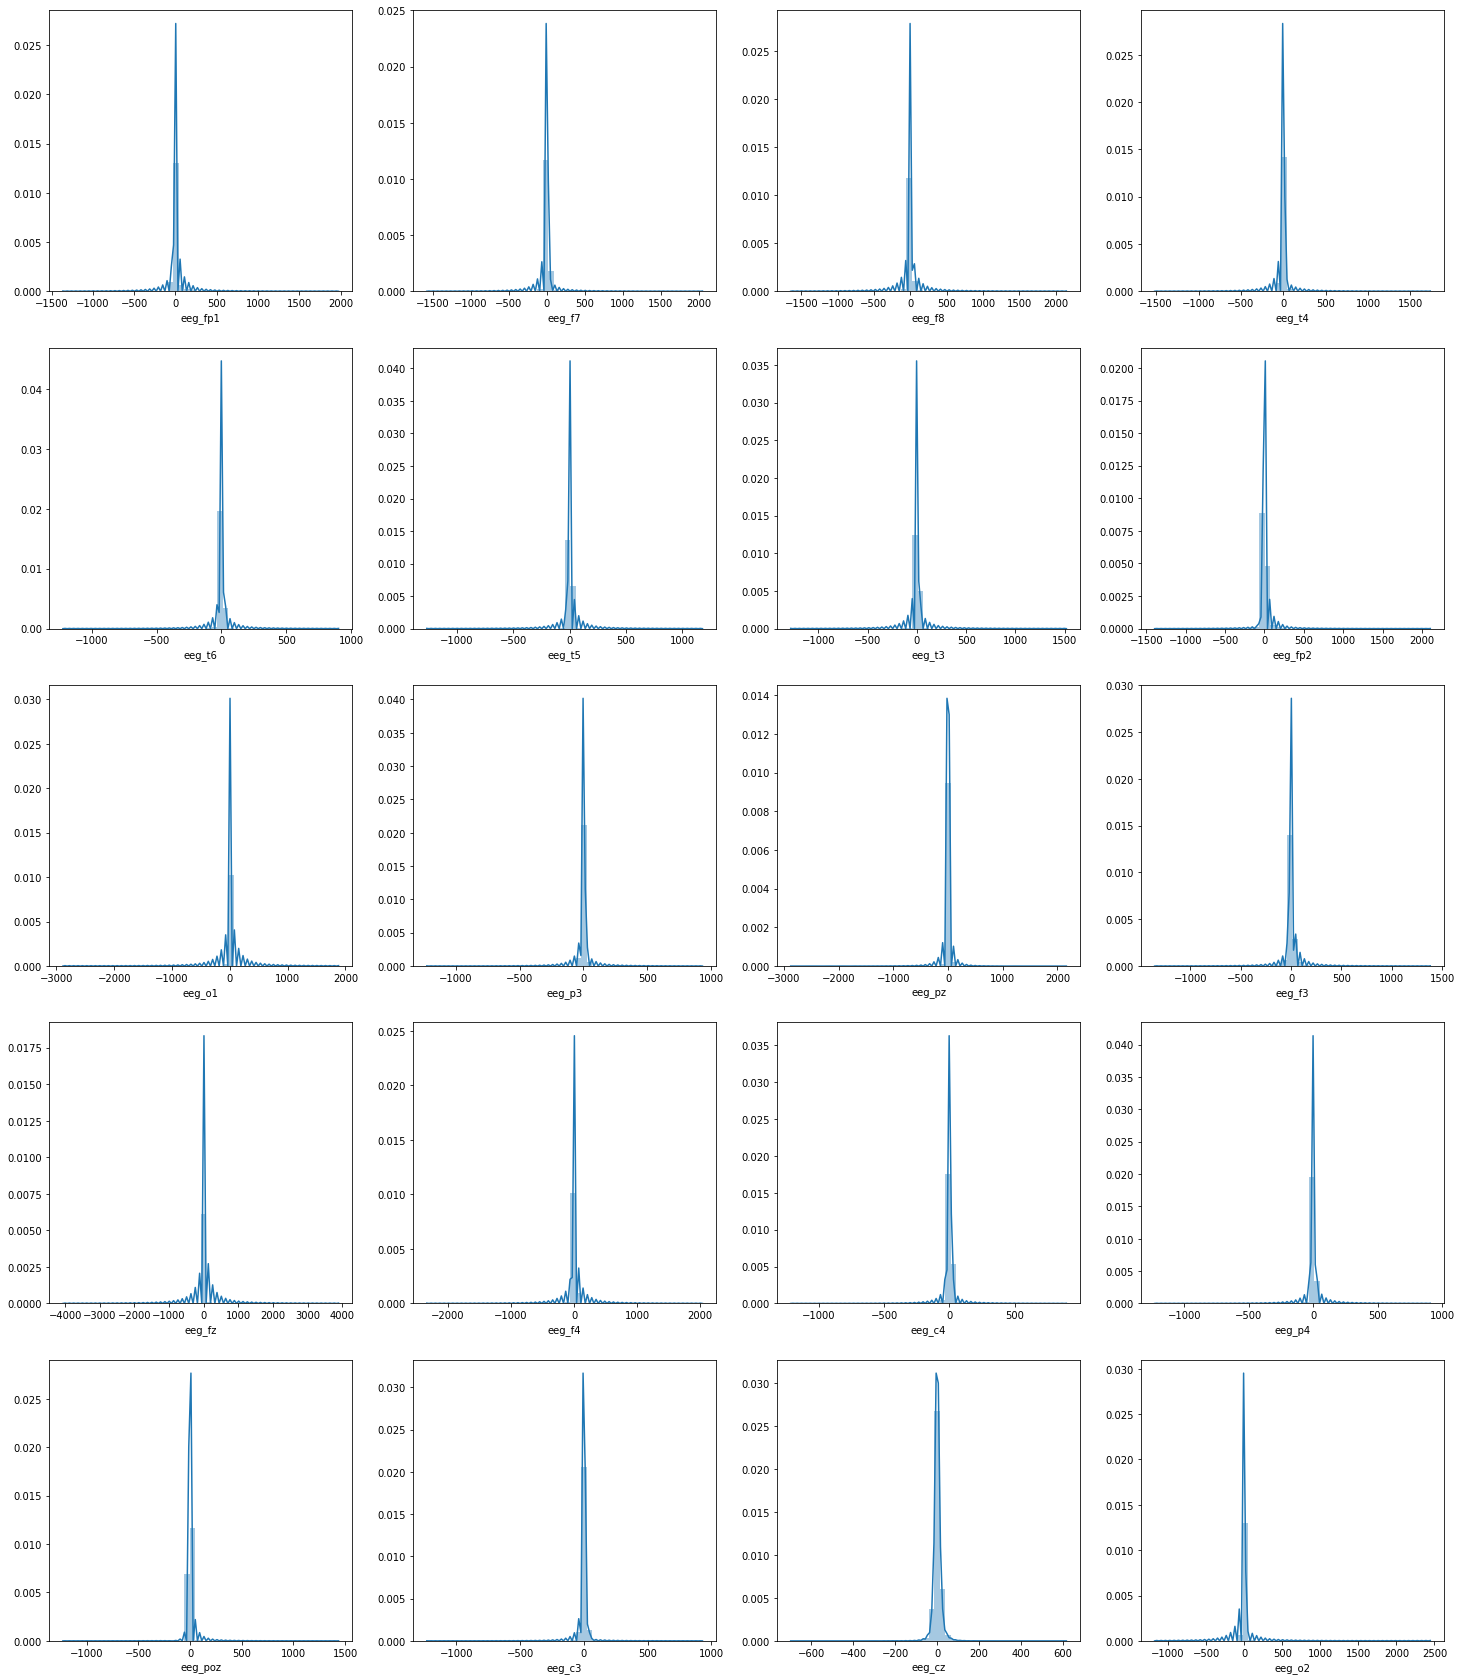

In [ ]:
plt.figure(figsize=(25,30))
frame=0
for i in tqdm(range(len(eeg_features))):
  frame+=1
  plt.subplot(5,4,frame)
  # sns.distplot(x='event', y=eeg_features[i], data= train.sample(10000))
  # sns.distplot(test.sample(10000)[eeg_features[i]], label='Test set')
  sns.distplot(train[eeg_features[i]], label='train set')

plt.show()

*   **From the EEG violin plots we can say that the values of each EEG signals are almost with mean value as 0 and variance is less than 500. So we can consider it to be nearly normal distributed.***
*   **We can also observe that mostly all the events is lying in almost same range so we cant simply put some value as a threshold and use it to classify the events.***



So now lets plot correlation matrix for train data

# **Probability,Statistical analysis of whole data-**

In [ ]:
train.corr()

,crew,time,seat,eeg_fp1,eeg_f7,eeg_f8,eeg_t4,eeg_t6,eeg_t5,eeg_t3,eeg_fp2,eeg_o1,eeg_p3,eeg_pz,eeg_f3,eeg_fz,eeg_f4,eeg_c4,eeg_p4,eeg_poz,eeg_c3,eeg_cz,eeg_o2,ecg,r,gsr
crew,1.000000,0.020509,-0.000026,0.004439,-0.000304,0.003582,-0.000615,0.009451,0.004767,-0.001903,0.004089,0.001793,0.002454,0.002228,0.003981,0.006493,0.006101,0.011650,0.006458,0.002011,0.006761,0.004878,0.000739,-0.092310,0.017672,0.046665
time,0.020509,1.000000,-0.000092,-0.001095,0.000230,-0.000951,-0.001122,-0.000004,0.001654,0.000063,-0.001906,0.001169,0.000479,0.000803,0.002119,-0.001744,0.000321,-0.000741,0.000037,0.000057,0.000538,0.000439,-0.002336,0.016148,0.002028,-0.023212
seat,-0.000026,-0.000092,1.000000,0.001293,0.009259,0.004619,0.007370,0.000428,0.005459,0.007842,0.002734,0.003672,0.002070,0.001865,0.002280,0.000718,0.004490,-0.002899,-0.001174,0.002245,0.001608,0.001167,0.005564,0.065637,0.895856,-0.203039
eeg_fp1,0.004439,-0.001095,0.001293,1.000000,0.649661,0.561712,0.434736,0.328606,0.332473,0.412335,0.808817,0.230432,0.432504,0.118993,0.390390,0.379386,0.346324,0.475388,0.426401,0.400337,0.537996,0.419241,0.295764,0.002471,0.001815,-0.005918
eeg_f7,-0.000304,0.000230,0.009259,0.649661,1.000000,0.493707,0.454118,0.309661,0.466838,0.510271,0.666813,0.158739,0.472020,0.050740,0.341315,0.282070,0.222679,0.385181,0.382612,0.435189,0.551835,0.392892,0.247659,0.000509,0.006118,0.001325
eeg_f8,0.003582,-0.000951,0.004619,0.561712,0.493707,1.000000,0.624069,0.428697,0.367796,0.361123,0.743647,0.201592,0.401075,0.048706,0.238039,0.341160,0.315901,0.540548,0.464684,0.411270,0.422634,0.360209,0.277458,-0.002611,0.003651,-0.000659
eeg_t4,-0.000615,-0.001122,0.007370,0.434736,0.454118,0.624069,1.000000,0.537165,0.398861,0.509766,0.520755,0.271376,0.456478,0.091479,0.253911,0.321776,0.300402,0.447606,0.494782,0.428613,0.441985,0.333357,0.343796,0.001917,0.005457,-0.002319
eeg_t6,0.009451,-0.000004,0.000428,0.328606,0.309661,0.428697,0.537165,1.000000,0.496123,0.387109,0.370542,0.341525,0.589913,0.127152,0.248195,0.194718,0.286851,0.578520,0.675777,0.577311,0.517501,0.364796,0.457946,-0.006497,0.000652,-0.002887
eeg_t5,0.004767,0.001654,0.005459,0.332473,0.466838,0.367796,0.398861,0.496123,1.000000,0.528224,0.355093,0.356271,0.675495,0.038977,0.253188,0.206063,0.192333,0.500662,0.561091,0.606291,0.605060,0.355579,0.427639,-0.001318,0.005259,-0.002809
eeg_t3,-0.001903,0.000063,0.007842,0.412335,0.510271,0.361123,0.509766,0.387109,0.528224,1.000000,0.367574,0.270236,0.524316,0.075870,0.251730,0.236480,0.196259,0.394582,0.444950,0.420079,0.514964,0.322943,0.311456,0.003185,0.006459,0.000319


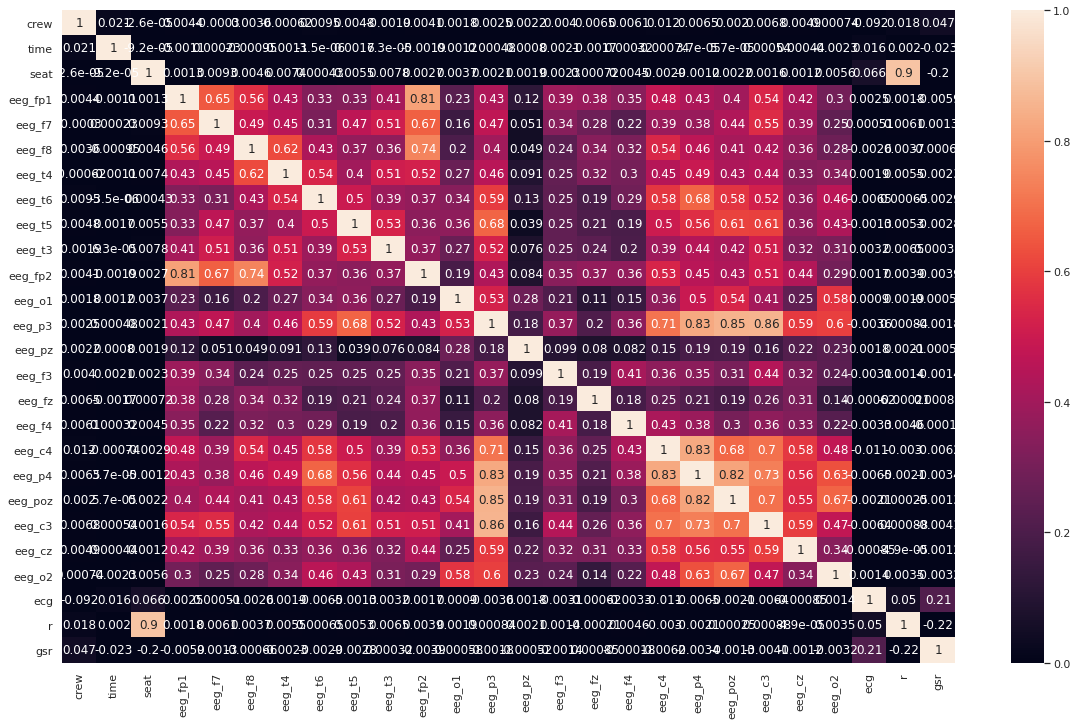

In [ ]:
plt.figure(figsize=(20,12))
cor=train.corr()
sns.heatmap(cor,annot=True,vmin=0,vmax=1)
plt.show()


*   **We can observe that GSR, Respiration and ECG are well correlated which we can conclude logically too(because when GSR increase when there is an stressful situation also ECG ie. measure of heart signal will also trigger with that stress, and respiration will also be high in such stressful situation.)***


In [ ]:
print(train['ecg'][train['event']=='A'].mean())
print(train['ecg'][train['event']=='B'].mean())
print(train['ecg'][train['event']=='C'].mean())
print(train['ecg'][train['event']=='D'].mean())


5860.9126184435945
5563.953477749556
4188.5995378722955
5867.798810081344


In [ ]:
print(train['ecg'][train['event']=='A'].median())
print(train['ecg'][train['event']=='B'].median())
print(train['ecg'][train['event']=='C'].median())
print(train['ecg'][train['event']=='D'].median())

5998.819824
6181.720215
5206.439941
5674.120117




*  **We can't say much from mean values because they 
might get affected due to outliers.Medians are more prone to outliers so lets look at median values of features in a data. ECG value should be high for B since it should increase when sudden surprise or change occur in condition.Similarly Then it should be minimum in case of event C when channelised attention is given ie. focussed on one task. It should be more in case of Diverted Attention(DA)ie. event D. We can see this easily in the median values ***




In [ ]:
print(train['g
sr'][train['event']=='A'].mean())
print(train['gsr'][train['event']=='B'].mean())
print(train['gsr'][train['event']=='C'].mean())
print(train['gsr'][train['event']=='D'].mean())

823.2707697716171
942.3972082644057
905.2582990332174
772.4223753689215


In [ ]:
print(train['gsr'][train['event']=='A'].median())
print(train['gsr'][train['event']=='B'].median())
print(train['gsr'][train['event']=='C'].median())
print(train['gsr'][train['event']=='D'].median())

741.070984
861.8060300000003
807.802979
714.911011




*   **It can be observed that gsr value for B is max followed by C,A,D respectively.**



In [ ]:
print(train['r'][train['event']=='A'].mean())
print(train['r'][train['event']=='B'].mean())
print(train['r'][train['event']=='C'].mean())
print(train['r'][train['event']=='D'].mean())

737.7484801369269
739.3995056359579
737.439664182398
736.1156598204516


In [ ]:
print(train['r'][train['event']=='A'].median())
print(train['r'][train['event']=='B'].median())
print(train['r'][train['event']=='C'].median())
print(train['r'][train['event']=='D'].median())

743.47699
763.655029
740.767029
737.012024




*   **Even if we think logically then surprise or sudden change in condition will bring lot of change in respiration so event B value should be max which we can observe here***



In [ ]:
for i in eeg_features:
  print('for feature:',i)
  print('for event A',train[i][train['event']=='A'].mean())
  print('for event B',train[i][train['event']=='B'].mean())
  print('for event C',train[i][train['event']=='C'].mean())
  print('for event D',train[i][train['event']=='D'].mean())
  print('#'*50)

for feature: eeg_fp1
for event A 4.361849060691831
for event B 9.40721776145682
for event C 2.2584836384994267
for event D 3.6026176833114394
##################################################
for feature: eeg_f7
for event A 1.479775327861923
for event B 4.449680746265235
for event C 0.8756098391357839
for event D 1.5972704651403404
##################################################
for feature: eeg_f8
for event A 1.3499397553106638
for event B 2.672040725843581
for event C 0.8617617587079464
for event D 1.2255783603677985
##################################################
for feature: eeg_t4
for event A 0.06041722541419472
for event B 0.17351768542922277
for event C 0.07132895629054961
for event D 0.19180850162113847
##################################################
for feature: eeg_t6
for event A 0.08374142357455222
for event B 0.1906547728125451
for event C 0.05705734327452422
for event D 0.10246275030276839
##################################################
for feature: eeg_t5
for

In [ ]:
for i in eeg_features:
  print('for feature:',i)
  print('for event A',train[i][train['event']=='A'].median())
  print('for event B',train[i][train['event']=='B'].median())
  print('for event C',train[i][train['event']=='C'].median())
  print('for event D',train[i][train['event']=='D'].median())
  print('#'*50)

for feature: eeg_fp1
for event A 0.524162
for event B 0.555606
for event C 0.1503575
for event D -0.01569
##################################################
for feature: eeg_f7
for event A 0.067616
for event B 0.263948
for event C 0.025702000000000003
for event D -0.15949000000000002
##################################################
for feature: eeg_f8
for event A 0.158644
for event B 0.098461
for event C 0.0323025
for event D 0.182065
##################################################
for feature: eeg_t4
for event A 0.0
for event B -0.061544000000000015
for event C 0.0
for event D 0.025143000000000002
##################################################
for feature: eeg_t6
for event A 0.0
for event B 0.049227
for event C 0.0
for event D 0.036887
##################################################
for feature: eeg_t5
for event A 0.0
for event B 0.014763
for event C 0.0
for event D 0.005518
##################################################
for feature: eeg_t3
for event A 0.0
for event B 



*   **EEG signals cant be interpreted by using this mean and median values. Becuase overall value of the EEG is the combination of all these signals. Here each eeg signal is the representation of voltage induced in that part of brain where the EEG instument was placed on the scalp.**


# Key takeaways from this EDA are:


*   **There is an imbalance in the data given** 
*   ***There are no missing values in this dataset***
*   ***From correlation heatmap we can say that ecg,r,gsr features are well correlated.***
* ***From probabilistic analysis we can say that generally we can observe the values of gsr,r,ecg,eeg are higher for event B (ie.SS) and later its for event A(ie, No Event).*** 
* ***There are few features in which mean and median values dont show same trend for events. Like for mean values of ecg are in order of D>A>B>C while median values for ecg are in order of B>A>D>C***








# **Feature Engineering**

In [ ]:
import warnings
import itertools
import numpy as np 
import pandas as pd
import seaborn as sns
import lightgbm as lgb
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, log_loss
import dask.dataframe as dd
import dask
import gc

from yellowbrick.text import TSNEVisualizer

%matplotlib inline
plt.style.use("fivethirtyeight")

# import os
# print(os.listdir("../input"))

warnings.filterwarnings(action='ignore')
sns.set_style('whitegrid')

In [ ]:
def gc():
    print(gc.collect())

dtypes = {"crew": "int8",
          "experiment": "category",
          "time": "float32",
          "seat": "int8",
          "eeg_fp1": "float32",
          "eeg_f7": "float32",
          "eeg_f8": "float32",
          "eeg_t4": "float32",
          "eeg_t6": "float32",
          "eeg_t5": "float32",
          "eeg_t3": "float32",
          "eeg_fp2": "float32",
          "eeg_o1": "float32",
          "eeg_p3": "float32",
          "eeg_pz": "float32",
          "eeg_f3": "float32",
          "eeg_fz": "float32",
          "eeg_f4": "float32",
          "eeg_c4": "float32",
          "eeg_p4": "float32",
          "eeg_poz": "float32",
          "eeg_c3": "float32",
          "eeg_cz": "float32",
          "eeg_o2": "float32",
          "ecg": "float32",
          "r": "float32",
          "gsr": "float32",
          "event": "category",
         }

import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# *Creating feature as pilot*

In [ ]:
%%time
train = dd.read_csv('train.csv',blocksize=256e6, dtype= dtypes)
test = dd.read_csv('test.csv',blocksize=256e6, dtype= dtypes)

CPU times: user 75.5 ms, sys: 0 ns, total: 75.5 ms
Wall time: 77.5 ms


In [ ]:
%%time
train = train.compute()
test = test.compute()

CPU times: user 1min 50s, sys: 13.2 s, total: 2min 3s
Wall time: 3min 12s


In [ ]:
import gc
print(gc.collect())

8


In [ ]:
train['pilot'] = 100* train['seat'] + train['crew']
test['pilot'] = 100* test['seat'] + test['crew']

In [ ]:
test_id = test['id']

In [ ]:
dic = {'A': 0, 'B': 1, 'C': 2, 'D': 3}
dic1 = {'CA':0,'DA':1,'SS':3,'LOFT':4}
train["event"] = train.event.apply(lambda x: dic[x])
train["event"] = train["event"].astype('int64')
train['experiment'] = train['experiment'].apply(lambda x: dic1[x])
test['experiment'] = test['experiment'].apply(lambda x: dic1[x])

train['experiment'] = train['experiment'].astype('int8')
test['experiment'] = test['experiment'].astype('int8')
y = train['event']

# *Creating new features as a difference of eegs*



*   We are finding out the differences between the eeg features because medical practitioners use these rather than absolute value of a voltage induced at particular electrode sensor. link to this https://www.kaggle.com/stuartbman/introduction-to-physiological-data
*   Given below is the typical diagram of how EEG instument is placed on the scalp and the locations from which the induced voltages are sensed. We can get the better idea of how difference between the eeg values are made to be a feature by referring to this image
*   The EEG features in our data represents the each location on the scalp as shown in the figure below, from which this voltage signals are sensed when pilots went through an experiment.



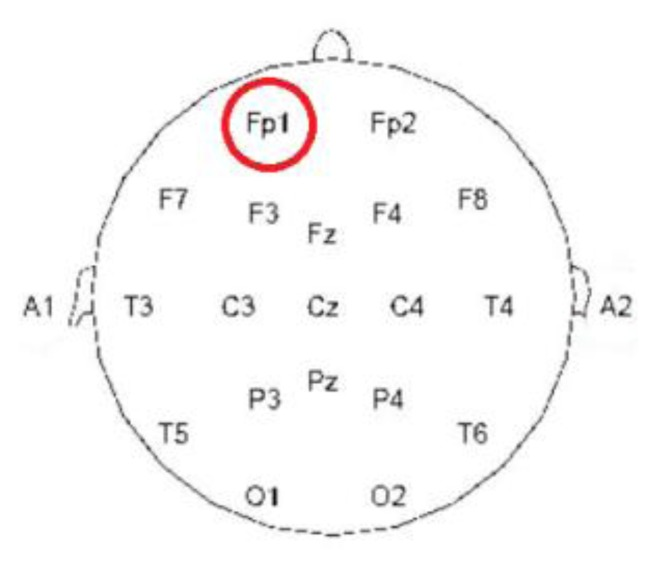

In [ ]:
from IPython.display import Image
Image(filename='/content/sensors-13-10273f2.jpg')

Making the difference between the eeg signals at different locations as a feature.

In [ ]:
train['fp1_f7'] = train['eeg_fp1'] - train['eeg_f7']
train['f7_t3'] = train['eeg_f7'] - train['eeg_t3']
train['t3_t5'] = train['eeg_t3'] - train['eeg_t5']
train['t5_o1'] = train['eeg_t5'] - train['eeg_o1']
train['fp1_f3'] = train['eeg_fp1'] - train['eeg_f7']

train['f3_c3'] = train['eeg_f3'] - train['eeg_c3']
train['c3_p3'] = train['eeg_c3'] - train['eeg_p3']
train['p3_o1'] = train['eeg_p3'] - train['eeg_o1']
train['fz_cz'] = train['eeg_fz'] - train['eeg_cz']
train['cz_pz'] = train['eeg_cz'] - train['eeg_pz']

train['pz_poz'] = train['eeg_pz'] - train['eeg_poz']
train['fp2_f8'] = train['eeg_fp2'] - train['eeg_f8']
train['f8_t4'] = train['eeg_f8'] - train['eeg_t4']
train['t4_t6'] = train['eeg_t4'] - train['eeg_t6']
train['t6_o2'] = train['eeg_t6'] - train['eeg_o2']

train['fp2_f4'] = train['eeg_fp2'] - train['eeg_f4']
train['f4_c4'] = train['eeg_f4'] - train['eeg_c4']
train['c4_p4'] = train['eeg_c4'] - train['eeg_p4']
train['p4_o2'] = train['eeg_p4'] - train['eeg_o2']

features_n = ['fp1_f7', 'f7_t3', 't3_t5', 't5_o1', 'fp1_f3', 'f3_c3', 'c3_p3', 'p3_o1', 'fz_cz', 'cz_pz',
                'pz_poz', 'fp2_f8', 'f8_t4', 't4_t6', 't6_o2', 'fp2_f4', 'f4_c4', 'c4_p4', 'p4_o2', "ecg", "r", "gsr"]

In [ ]:
train= train.drop(columns=["eeg_fp1", "eeg_f7", "eeg_f8", "eeg_t4", "eeg_t6", "eeg_t5", "eeg_t3", "eeg_fp2", "eeg_o1", "eeg_p3", "eeg_pz", "eeg_f3", "eeg_fz", "eeg_f4", "eeg_c4", "eeg_p4", "eeg_poz", "eeg_c3", "eeg_cz", "eeg_o2"],axis=1)

In [ ]:
test['fp1_f7'] = test['eeg_fp1'] - test['eeg_f7']
test['f7_t3'] = test['eeg_f7'] - test['eeg_t3']
test['t3_t5'] = test['eeg_t3'] - test['eeg_t5']
test['t5_o1'] = test['eeg_t5'] - test['eeg_o1']
test['fp1_f3'] = test['eeg_fp1'] - test['eeg_f7']

test['f3_c3'] = test['eeg_f3'] - test['eeg_c3']
test['c3_p3'] = test['eeg_c3'] - test['eeg_p3']
test['p3_o1'] = test['eeg_p3'] - test['eeg_o1']
test['fz_cz'] = test['eeg_fz'] - test['eeg_cz']
test['cz_pz'] = test['eeg_cz'] - test['eeg_pz']

test['pz_poz'] = test['eeg_pz'] - test['eeg_poz']
test['fp2_f8'] = test['eeg_fp2'] - test['eeg_f8']
test['f8_t4'] = test['eeg_f8'] - test['eeg_t4']
test['t4_t6'] = test['eeg_t4'] - test['eeg_t6']
test['t6_o2'] = test['eeg_t6'] - test['eeg_o2']

test['fp2_f4'] = test['eeg_fp2'] - test['eeg_f4']
test['f4_c4'] = test['eeg_f4'] - test['eeg_c4']
test['c4_p4'] = test['eeg_c4'] - test['eeg_p4']
test['p4_o2'] = test['eeg_p4'] - test['eeg_o2']

features_n = ['fp1_f7', 'f7_t3', 't3_t5', 't5_o1', 'fp1_f3', 'f3_c3', 'c3_p3', 'p3_o1', 'fz_cz', 'cz_pz',
                'pz_poz', 'fp2_f8', 'f8_t4', 't4_t6', 't6_o2', 'fp2_f4', 'f4_c4', 'c4_p4', 'p4_o2', "ecg", "r", "gsr"]

In [ ]:
test= test.drop(columns=["eeg_fp1", "eeg_f7", "eeg_f8", "eeg_t4", "eeg_t6", "eeg_t5", "eeg_t3", "eeg_fp2", "eeg_o1", "eeg_p3", "eeg_pz", "eeg_f3", "eeg_fz", "eeg_f4", "eeg_c4", "eeg_p4", "eeg_poz", "eeg_c3", "eeg_cz", "eeg_o2"],axis=1)

In [ ]:
train.columns

Index(['crew', 'experiment', 'time', 'seat', 'ecg', 'r', 'gsr', 'event',
       'pilot', 'fp1_f7', 'f7_t3', 't3_t5', 't5_o1', 'fp1_f3', 'f3_c3',
       'c3_p3', 'p3_o1', 'fz_cz', 'cz_pz', 'pz_poz', 'fp2_f8', 'f8_t4',
       't4_t6', 't6_o2', 'fp2_f4', 'f4_c4', 'c4_p4', 'p4_o2'],
      dtype='object')

In [ ]:
test.columns

Index(['id', 'crew', 'experiment', 'time', 'seat', 'ecg', 'r', 'gsr', 'pilot',
       'fp1_f7', 'f7_t3', 't3_t5', 't5_o1', 'fp1_f3', 'f3_c3', 'c3_p3',
       'p3_o1', 'fz_cz', 'cz_pz', 'pz_poz', 'fp2_f8', 'f8_t4', 't4_t6',
       't6_o2', 'fp2_f4', 'f4_c4', 'c4_p4', 'p4_o2'],
      dtype='object')

In [ ]:
print(train.shape)
print(test.shape)

(4867421, 28)
(17965143, 28)


In [ ]:
labels = train['event']
feature_n = ['fp1_f7', 'f7_t3', 't3_t5', 't5_o1', 'fp1_f3', 'f3_c3', 'c3_p3',
       'p3_o1', 'fz_cz', 'cz_pz', 'pz_poz', 'fp2_f8', 'f8_t4', 't4_t6',
       't6_o2', 'fp2_f4', 'f4_c4', 'c4_p4', 'p4_o2','ecg', 'r', 'gsr','pilot']
features = ["crew", "seat"] + feature_n

In [ ]:
train_n = train[features]
test_n = test[features]

In [ ]:
print(train.shape)
print(test.shape)

(4867421, 28)
(17965143, 28)


In [ ]:
train_n.head()

,crew,seat,fp1_f7,f7_t3,t3_t5,t5_o1,fp1_f3,f3_c3,c3_p3,p3_o1,fz_cz,cz_pz,pz_poz,fp2_f8,f8_t4,t4_t6,t6_o2,fp2_f4,f4_c4,c4_p4,p4_o2,ecg,r,gsr,pilot
0,1,1,-32.061249,3.063501,-10.025200,4.505400,-32.061249,-2.149799,-4.246099,-4.389200,5.02662,-7.87249,-15.280560,2.831440,3.265889,-29.511000,2.210200,-9.786160,-34.278709,19.931400,2.929999,-4520.0,817.705994,388.829987,101
1,1,1,-30.859322,7.420601,-9.433300,3.802200,-30.859322,-0.844101,-2.784100,-2.502600,1.50142,-4.13779,-14.219591,2.848790,-5.566280,-19.726530,-1.780900,-13.576490,-24.069029,11.771099,1.649500,-4520.0,817.705994,388.829987,101
2,1,1,-19.748699,4.988400,-6.710999,4.022900,-19.748699,0.755301,-4.483700,-1.228600,2.98207,-7.04100,-14.592839,-15.439407,-9.373301,8.580900,-6.103899,-12.794207,24.718100,-31.408899,-2.850700,-4520.0,817.705994,388.829987,101
3,1,1,-14.157300,6.467001,-12.351301,0.840500,-14.157300,0.625200,-4.910299,-6.406601,4.73083,-6.09818,-13.998099,-2.689596,-9.979421,-8.120800,1.534700,-11.716316,-7.114301,-4.582300,4.157801,-4520.0,817.705994,388.829987,101
4,1,1,-18.659389,5.370501,-8.181499,-2.969002,-18.659389,-1.546299,-4.862301,-6.567101,5.61014,-10.80068,-10.169999,-2.067034,-5.634436,-14.085599,-2.979200,-9.961520,1.452610,-16.199261,-0.058100,-4520.0,817.705994,388.829987,101


In [ ]:
test_n.head()

,crew,seat,fp1_f7,f7_t3,t3_t5,t5_o1,fp1_f3,f3_c3,c3_p3,p3_o1,fz_cz,cz_pz,pz_poz,fp2_f8,f8_t4,t4_t6,t6_o2,fp2_f4,f4_c4,c4_p4,p4_o2,ecg,r,gsr,pilot
0,1,0,11.771669,39.311329,153.896500,-195.258163,11.771669,-10.093401,-1.322201,24.982141,-0.781799,-16.736900,34.206299,-5.215587,29.201006,19.489300,-39.558151,2.823700,7.360620,-10.371260,4.103510,-7323.120117,643.177002,594.778992,1
1,1,1,-48.865799,88.353058,11.541229,289.867706,-48.865799,6.555150,1.294680,303.386169,-318.951965,1139.603638,22.295460,10.129301,21.898800,-0.668940,2.085354,13.532600,235.066498,-217.297318,2.142734,-3335.080078,826.724976,136.235001,101
2,1,0,4.763597,15.511301,120.081200,-120.553001,4.763597,-6.945601,-8.416500,31.118099,-2.040501,-13.229200,31.072441,8.454500,0.451640,18.142941,-26.789957,8.857840,2.721040,-21.314098,9.994342,-7323.120117,643.177002,594.778992,1
3,1,1,-52.606899,88.459572,15.448610,302.143829,-52.606899,3.339390,-1.510960,315.554077,-342.721008,1131.666016,24.229479,8.643400,20.135189,2.799710,-4.184993,13.519099,228.049606,-209.309464,-4.865933,-3335.080078,826.724976,136.235001,101
4,1,0,4.468730,53.794582,-87.342102,38.151760,4.468730,19.828430,20.684471,-16.456640,5.385900,-20.427700,41.615429,-0.815600,15.505899,-0.472000,-27.368420,-13.721850,22.834249,-17.174620,-5.087900,-7323.120117,643.177002,594.778992,1


So as we can see that data need nornalization since it is in different ranges.So we use MinMaxScaler to so this

# *Noramalizing the data*

In [ ]:
# tr_exp= train_n['experiment']
# te_exp = test_n['experiment']
# train_n=train_n.drop(columns=['experiment'],axis=1)
# test_n.drop(columns=['experiment'],axis=1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
tr_col = train_n.columns
te_col = test_n.columns
train_n = sc.fit_transform((train_n))
test_n = sc.transform((test_n))

In [ ]:
train_n = pd.DataFrame(train_n)
test_n = pd.DataFrame(test_n)

In [ ]:
train_n.columns = tr_col
test_n.columns =te_col

In [ ]:
train_n.head()

,crew,seat,fp1_f7,f7_t3,t3_t5,t5_o1,fp1_f3,f3_c3,c3_p3,p3_o1,fz_cz,cz_pz,pz_poz,fp2_f8,f8_t4,t4_t6,t6_o2,fp2_f4,f4_c4,c4_p4,p4_o2,ecg,r,gsr,pilot
0,0.0,1.0,0.511670,0.408734,0.358142,0.386973,0.511670,0.494884,0.573562,0.396980,0.517656,0.427181,0.548867,0.430728,0.450700,0.471533,0.711881,0.410456,0.523447,0.475266,0.733033,0.266527,0.937234,0.194429,0.892857
1,0.0,1.0,0.511978,0.410094,0.358398,0.386846,0.511978,0.495345,0.575254,0.397368,0.517211,0.427920,0.549070,0.430734,0.448138,0.475037,0.710670,0.409700,0.525765,0.467195,0.732632,0.266527,0.937234,0.194429,0.892857
2,0.0,1.0,0.514821,0.409335,0.359571,0.386886,0.514821,0.495909,0.573288,0.397631,0.517398,0.427345,0.548998,0.425157,0.447034,0.485175,0.709357,0.409856,0.536841,0.424484,0.731222,0.266527,0.937234,0.194429,0.892857
3,0.0,1.0,0.516252,0.409796,0.357139,0.386312,0.516252,0.495863,0.572794,0.396565,0.517619,0.427532,0.549112,0.429045,0.446858,0.479193,0.711676,0.410071,0.529614,0.451019,0.733418,0.266527,0.937234,0.194429,0.892857
4,0.0,1.0,0.515100,0.409454,0.358937,0.385623,0.515100,0.495097,0.572850,0.396532,0.517730,0.426602,0.549843,0.429235,0.448119,0.477057,0.710306,0.410421,0.531559,0.439528,0.732097,0.266527,0.937234,0.194429,0.892857


In [ ]:
test_n.head()

,crew,seat,fp1_f7,f7_t3,t3_t5,t5_o1,fp1_f3,f3_c3,c3_p3,p3_o1,fz_cz,cz_pz,pz_poz,fp2_f8,f8_t4,t4_t6,t6_o2,fp2_f4,f4_c4,c4_p4,p4_o2,ecg,r,gsr,pilot
0,0.0,0.0,0.522888,0.420048,0.428819,0.350893,0.522888,0.492081,0.576945,0.403022,0.516922,0.425427,0.558317,0.428275,0.458224,0.489081,0.699202,0.412970,0.532901,0.445293,0.733401,0.213412,0.449892,0.297410,0.000000
1,0.0,1.0,0.507369,0.435356,0.367441,0.438514,0.507369,0.497956,0.579972,0.460292,0.476710,0.654199,0.556043,0.432954,0.456106,0.481862,0.711843,0.415105,0.584599,0.240615,0.732787,0.288980,0.962418,0.068122,0.892857
2,0.0,0.0,0.521094,0.412619,0.414239,0.364386,0.521094,0.493192,0.568739,0.404284,0.516763,0.426121,0.557719,0.432443,0.449884,0.488599,0.703078,0.414173,0.531847,0.434469,0.735246,0.213412,0.449892,0.297410,0.000000
3,0.0,1.0,0.506412,0.435389,0.369126,0.440732,0.506412,0.496821,0.576726,0.462795,0.473706,0.652628,0.556412,0.432501,0.455594,0.483104,0.709940,0.415103,0.583006,0.248516,0.730591,0.288980,0.962418,0.068122,0.892857
4,0.0,0.0,0.521019,0.424569,0.324806,0.393051,0.521019,0.502641,0.602400,0.394498,0.517702,0.424697,0.559732,0.429616,0.454251,0.481933,0.702902,0.409671,0.536414,0.438564,0.730521,0.213412,0.449892,0.297410,0.000000


In [ ]:
y = labels

## *Balancing the classes*

As we have seen in the EDA we need to balance the data so we choose SMOTE. https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SMOTE.html

In [ ]:
# https://towardsdatascience.com/machine-learning-multiclass-classification-with-imbalanced-data-set-29f6a177c1a
from imblearn.over_sampling import SMOTE
smote=SMOTE('minority')
train_n,y = smote.fit_sample(train_n,y.ravel()) 

In [ ]:
train_n.shape

(7585633, 25)

In [ ]:
train_n = pd.DataFrame(train_n)
y = pd.DataFrame(y)

In [ ]:
train_n.columns = tr_col
y.columns = ['event']

In [ ]:
len(train_n['pilot'].unique())

18

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_cv,y_train,y_cv = train_test_split(train_n, y, test_size=0.2,random_state = 40)

In [ ]:
import lightgbm as lgb
params = {
    'objective':'multiclass',
    'num_class':4,
    'metric':'multi_error',
    'num_leaves':30,
    'min_child_weight':50,
    'learning_rate':0.1,
    'bagging_fraction':0.7,
    'feature_fraction':0.7,
    'reg_alpha':0.15,
    'reg_alpha':0.15,
    'min_child_weight':50,
    'bagging_seed':420,
    'verbosity':-1
}

In [ ]:
lgb_train = lgb.Dataset(X_train,label=y_train)
lgb_test = lgb.Dataset(X_cv,y_cv)
model = lgb.train(params, lgb_train, 1000, valid_sets=[lgb_test],early_stopping_rounds = 50, verbose_eval = 100)

Training until validation scores don't improve for 50 rounds.
[100]	valid_0's multi_error: 0.0905007
[200]	valid_0's multi_error: 0.0681815
[300]	valid_0's multi_error: 0.0577506
[400]	valid_0's multi_error: 0.0511262
[500]	valid_0's multi_error: 0.0461662
[600]	valid_0's multi_error: 0.042626
[700]	valid_0's multi_error: 0.0398958
[800]	valid_0's multi_error: 0.0377549
[900]	valid_0's multi_error: 0.0359878
[1000]	valid_0's multi_error: 0.0342733
Did not meet early stopping. Best iteration is:
[1000]	valid_0's multi_error: 0.0342733


In [ ]:
import joblib
# save model
joblib.dump(model, 'lgb1.pkl')
# load model
# gbm_pickle = joblib.load('lgb1.pkl')

['lgb1.pkl']

In [ ]:
import joblib

In [ ]:
gbm_pickle = joblib.load('lgb.pkl')

In [ ]:
model = gbm_pickle

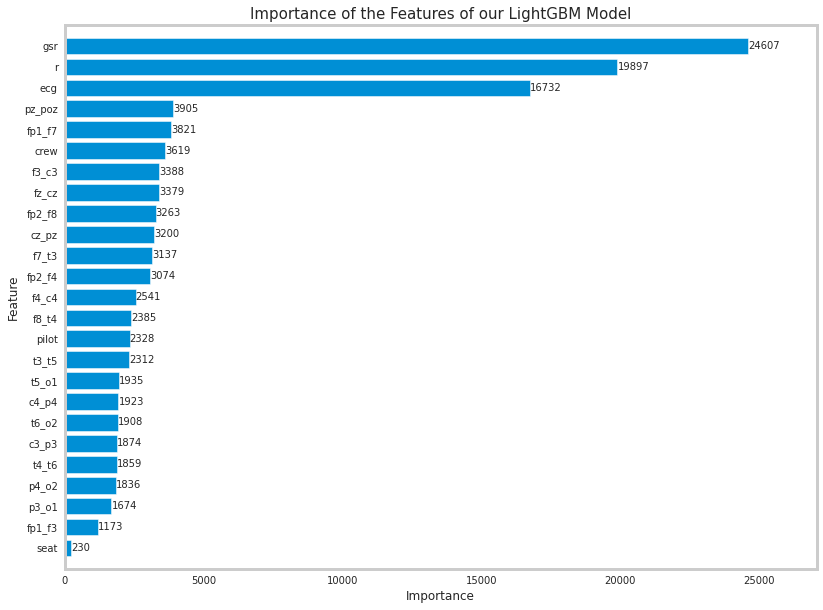

In [ ]:
fig, ax = plt.subplots(figsize=(12,10))
lgb.plot_importance(model, height=0.8, ax=ax)
ax.grid(False)
plt.ylabel('Feature', size=12)
plt.xlabel('Importance', size=12)
plt.title("Importance of the Features of our LightGBM Model", fontsize=15)
plt.show()

In [ ]:
pred_val = model.predict(X_cv, num_iteration= model.best_iteration )
# print('multiclass log loss',round(log_loss(np.array(y_test.values,pred_val))),3)

In [ ]:
pred_val

array([[2.41053645e-01, 7.58826937e-01, 2.36944309e-05, 9.57235073e-05],
       [8.50053120e-03, 9.91105634e-01, 1.28474483e-07, 3.93706243e-04],
       [9.96272296e-01, 2.20704263e-03, 1.30291295e-03, 2.17748343e-04],
       ...,
       [1.76519913e-02, 9.82307956e-01, 4.87849274e-06, 3.51741477e-05],
       [7.04203158e-02, 9.28944944e-01, 2.52526997e-05, 6.09487395e-04],
       [1.79253115e-02, 9.81200654e-01, 4.34768122e-04, 4.39265950e-04]])

In [ ]:
print((y_cv['event'].to_numpy()))

[0 1 0 ... 1 1 1]


In [ ]:
print('multiclass log loss',round(log_loss(y_cv['event'].to_numpy(),pred_val),5))

multiclass log loss 0.10627


Normalized confusion matrix
[[9.39581617e-01 3.23228009e-03 5.42216256e-03 5.17639402e-02]
 [1.93859256e-02 9.79278006e-01 1.33089680e-03 5.17187877e-06]
 [8.43528752e-03 8.33826049e-04 9.90388260e-01 3.42626704e-04]
 [6.39036814e-02 0.00000000e+00 3.29937486e-03 9.32796944e-01]]


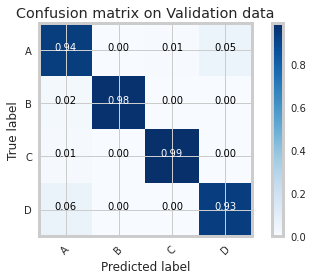

In [ ]:
conf_mat_val = confusion_matrix(np.argmax(pred_val, axis=1), y_cv.values)
plot_confusion_matrix(conf_mat_val, ["A", "B", "C", "D"], title='Confusion matrix on Validation data', normalize=True)